# K-Nearest Neighbors - PCA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier #Import scikit-Tree For Decision Tree
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report,confusion_matrix #import Confusion Matrix
from sklearn.model_selection import train_test_split # Splitting the data
from sklearn import preprocessing # Normalizing

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import time


D:\Users\sourc\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
df_o = pd.read_csv("../data/processed/data_allcolumns.csv",index_col=0)

In [3]:
# Normalizing the data
x = df_o.values #returns a numpy array
col = df_o.columns
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_n = pd.DataFrame(x_scaled, columns = col)

# df_n

In [4]:
# Separate majority and minority classes
df_majority = df_o[df_o['isFirstDown']==0]
df_minority = df_o[df_o['isFirstDown']==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,                  # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=123)              # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled['isFirstDown'].value_counts()

1    22532
0    22532
Name: isFirstDown, dtype: int64

In [5]:
X = df_o.drop("isFirstDown",1)   #Feature Matrix
y = df_o["isFirstDown"]          #Target Variable

In [6]:
# from sklearn.model_selection import train_test_split # Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=72)

numDimensions = X_test.shape[1]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(19957, 32)
(8554, 32)
(19957,)
(8554,)


In [7]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 18) # Where to change the number of PCA variables
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [9]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance)
print (np.count_nonzero(explained_variance))

[0.07692646 0.07434848 0.06821841 0.05718668 0.05362757 0.05189172
 0.04725141 0.0438497  0.03838575 0.03529731 0.03478605 0.03317814
 0.03257475 0.03176834 0.0299293  0.02903888 0.02842904 0.02780369]
18


In [10]:
for i in range(0,np.count_nonzero(explained_variance + 1)):
    print(i," ", sum(explained_variance[0:i]))

0   0
1   0.0769264562827523
2   0.15127493675947265
3   0.21949334707459328
4   0.2766800226794255
5   0.3303075894093685
6   0.38219931430938253
7   0.4294507262348861
8   0.4733004230233374
9   0.5116861752993308
10   0.5469834892552902
11   0.5817695370812054
12   0.6149476818643898
13   0.6475224269532672
14   0.6792907664208976
15   0.7092200648591701
16   0.738258942690965
17   0.7666879853716938


In [11]:
# Fitting Logistic Regression to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=9)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [12]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [13]:
accText = 'K-Nearest, PCA'

In [14]:
# Model Accuracy, how often is the classifier correct?

# accuracy: (tp + tn) / (p + n)
accuracy = (accuracy_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Accuracy',accuracy))
# precision tp / (tp + fp)
precision = (precision_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Precision',precision))
# recall: tp / (tp + fn)
recall = (recall_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Recall',recall))
# f1: 2 tp / (2 tp + fp + fn)
f1 = (f1_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('F1 score',f1))
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = (auc(false_positive_rate, true_positive_rate)).astype('float64')
print('{:>10}: {:0.2%}'.format('ROC score',roc_auc))
# Root Mean Square Error
from sklearn.metrics import mean_squared_error
rmse = (mean_squared_error(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2}'.format('RMSE',rmse))

acc = pd.read_csv("../data/external/accuracies.csv", index_col=0)
acc.at[accText, 'Accuracy'] = (accuracy)
acc.at[accText, 'Precision'] = (precision)
acc.at[accText, 'Recall'] = (recall)
acc.at[accText, 'F1'] = (f1)
acc.at[accText, 'ROC'] = (roc_auc)
acc.at[accText, 'RMSE'] = (rmse)
acc.to_csv("../data/external/accuracies.csv")

  Accuracy: 80.36%
 Precision: 56.45%
    Recall: 21.08%
  F1 score: 30.69%
 ROC score: 58.42%
      RMSE: 0.2


In [15]:
#Present Confusion Matrix to show accuracy
print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred, labels=[1,0]))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Confusion Matrix:

[[ 372 1393]
 [ 287 6502]]

Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.96      0.89      6789
           1       0.56      0.21      0.31      1765

    accuracy                           0.80      8554
   macro avg       0.69      0.58      0.60      8554
weighted avg       0.77      0.80      0.77      8554



In [16]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap


In [17]:
knnvals={}
for i in range(1,34):
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    knnvals[i]=accuracy
    
dfknn = pd.DataFrame.from_dict(knnvals, orient="index", columns=['acc'])
dfknn

,acc
1,0.730652
2,0.792495
3,0.775076
4,0.796002
5,0.795184
6,0.800912
7,0.799158
8,0.801964
9,0.803601
10,0.805588


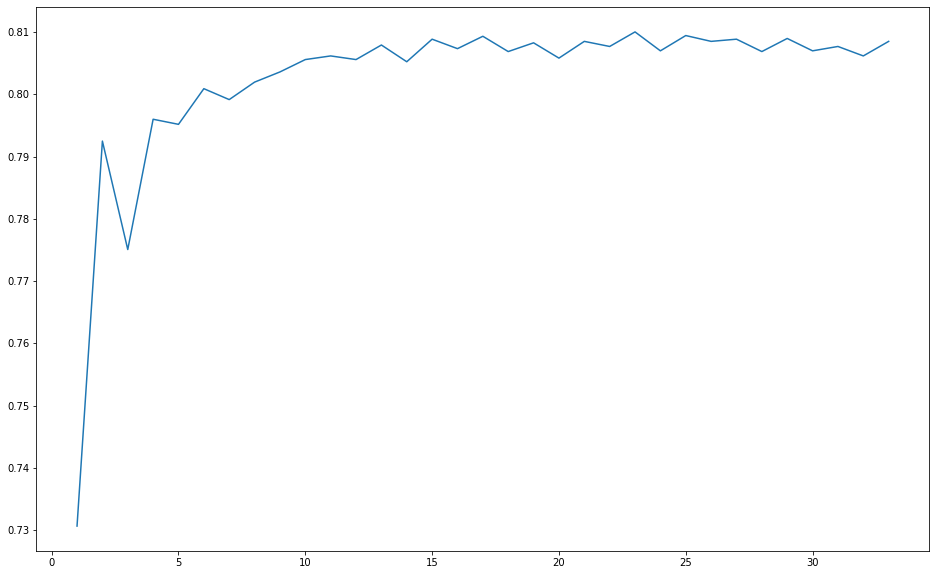

In [18]:
plt.figure(figsize=(16, 10))
plt.plot(dfknn, scalex=range(1,34))
